# Description of Problem

You have a function called random, which generates a random number between 0 to 1, uniformly. 
How would one be able to calculate $\pi$ using this function?

# Approach to the Solution

You are given the function which uniformly draws a number between the bounds of 0 and 1. We can frame this problem by drawing a unit square, which has lengths equal to 1. The procedure here is to imagine that you can draw/sample from the uniform distribution, generating a pair of (x,y) coordinates respectively. Ultimately, this point which is defined by these two variables will be confined by the area of the unit square. We can then compute the distance from the origin as to where this point lies, simply by applying Pythagorean Theorem:

$$ r^2 = x^2 + y^2 $$

Then, having this calculated distance, we can see from Figure 1 that any point that has a distance less than or equal to 1 would either lie on the boundry of the circle or within it. Thus, we can then take the ratio of the number of points which fall within this blue-shaded area with respect to the total number of points (which would encompass those that fall within and outside the 1/4 circular boundry) as a proxy and similar ratio to the area of the circle ($A_{circle}=\pi r^2$) relative to the area of the square ($A_{square} = r^2$). Hence this hypothesis leads to the estimation of $\pi$ but scaled by a factor of 4 as only one 1/4 of the circle is used. 

The expectation here is that as you increase the number of points that you use to sample, you will get a better approximation of $\pi$.

$$ \bar\pi \approx \frac{A_{circle}}{A_{square}} \approx \frac{n^{points}_{circle}}{n^{points}_{total}} $$

[<img src="Figures/UnitSquare_Circle_Estimate_Pi.png" width="500"/>](Figures/UnitSquare_Circle_Estimate_Pi.png)
#### 

In [4]:
import pandas as pd
import numpy as np
from numpy import random
import seaborn as sns
import os
import time

In [6]:
def estimate_pi(n_points):
    """
    Function here takes one argument
    Inputs
    -------
    n: number of points you would use to estimate
    
    Returns
    -------
    Estimate of pi
    """
    # Initially you want to set the two variables 
    # which are the number of points in circle and number of points outside to 0
    
    num_points_circle = 0
    
    for i in range(n_points):
        x = random.uniform(0,1)
        y = random.uniform(0,1)
        
        d_est = x**2+y**2
        if d_est <= 1:
            num_points_circle += 1
        
    return 4*(num_points_circle/n_points)

In [14]:
def estimate_pi2(n_points):
    """
    Function here takes one argument
    Inputs
    -------
    n: number of points you would use to estimate
    
    Returns
    -------
    Estimate of pi
    """
    x = random.random(n_points)
    y = random.random(n_points)
    d_est = x**2 + y**2
    num_points_circle = sum(d_est<=1)
    
    return 4*(num_points_circle/n_points)

In [28]:
num_points_list = [10**i for i in range(8)]
pi_list, run_time = [], []
for num_iters in num_points_list:
    t1 = time.time()
    pi_est1 = estimate_pi(num_iters)
    t2 = time.time()
    pi_est2 = estimate_pi2(num_iters)
    t3 = time.time()

    t_alg1 = t2-t1
    t_alg2 = t3-t2
    pi_list.append([pi_est1, pi_est2])
    run_time.append([t_alg1, t_alg2])

In [78]:
results = pd.DataFrame(pi_list, columns = ['pi_est_1', 'pi_est_2']).merge(pd.DataFrame(run_time, columns = ['t_alg_1', 't_alg_2']), left_index = True, right_index = True)
results.index = num_points_list
results

,pi_est_1,pi_est_2,t_alg_1,t_alg_2
1,4.000000,4.000000,0.000028,0.000038
10,4.000000,2.400000,0.000026,0.000025
100,3.240000,3.120000,0.000245,0.000139
1000,3.212000,3.028000,0.002424,0.001553
10000,3.122800,3.130400,0.024232,0.011495
100000,3.140200,3.133080,0.189154,0.098550
1000000,3.140440,3.138992,1.876739,1.003869
10000000,3.140453,3.141411,18.470082,9.902475


In [125]:
math.pi

3.141592653589793

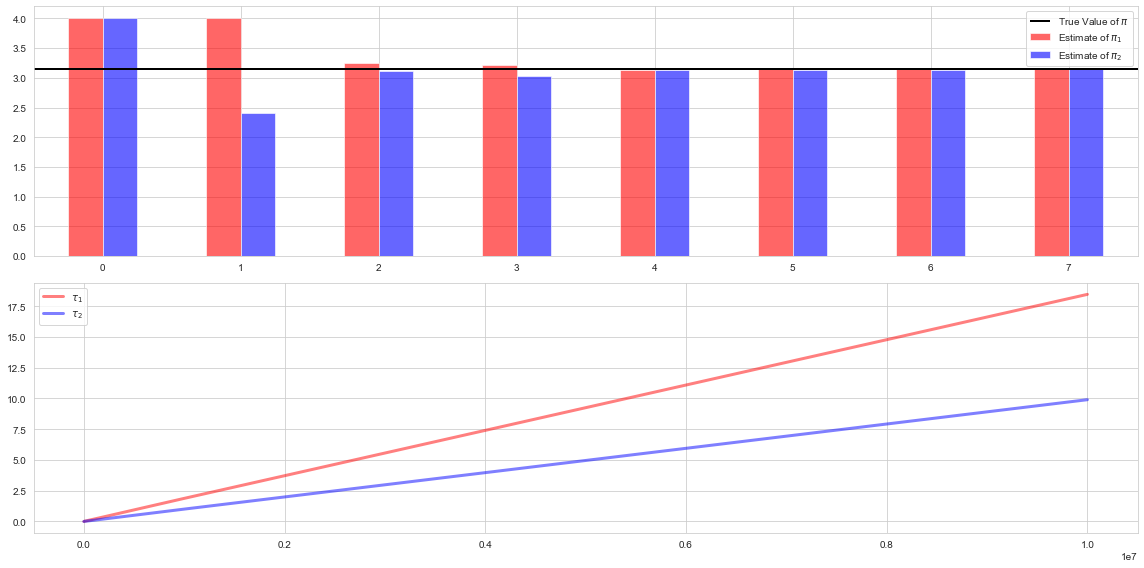

In [165]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import ticker
import math

with sns.axes_style("whitegrid"):

    fig, axes = plt.subplots(figsize = (16,8), nrows = 2)
    
    results.iloc[:, 0:2].plot(kind='bar', color = ['r', 'b'], alpha = 0.6, ax = axes[0], grid = True)
    axes[0].hlines(y = math.pi, xmin = -1, xmax = results.index[-1], lw = 2, ls = '-', color = 'k')
    axes[0].set_xticklabels(labels = results.index, rotation = 0)
    axes[0].xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
    axes[0].legend(labels = ['True Value of $\pi$', 'Estimate of $\pi_1$', 'Estimate of $\pi_2$'])
    #axes[0].xaxis.set_major_formatter(formatter) 

    results.iloc[:, 2:].plot(kind='line', color = ['r', 'b'], alpha = 0.5, ax = axes[1], grid = True, lw = 3)
    axes[1].legend(labels = ['$\\tau_1$', '$\\tau_2$'])
    plt.tight_layout()
    plt.show()